## Import Package

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

## Image directory

In [2]:
directory = 'git_kidney/'

In [3]:
img_list = []
for dirPath, dirName, fileList in os.walk(directory):
    for file in fileList:
        if 'png' in file:
            img_list.append(os.path.join(dirPath, file))

## Remove personal details

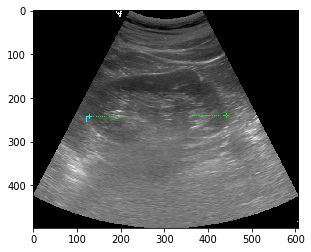

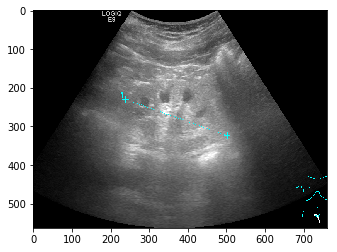

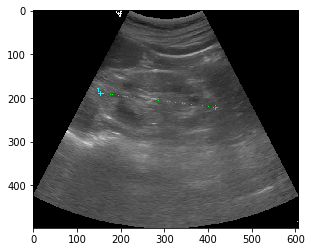

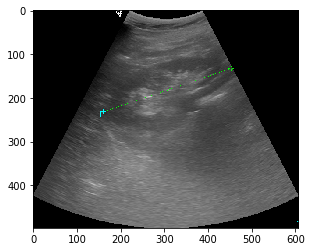

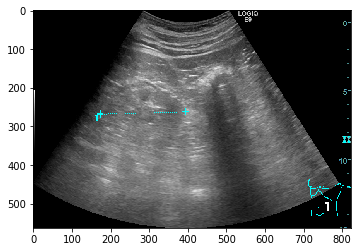

In [4]:
crop_list = []
for path in img_list[:5]:
    image = cv2.imread(path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # covert pixel-values with threshold
    _,th2 = cv2.threshold(gray, 10, 1, cv2.THRESH_BINARY)
    # find 
    im2, contours, hierarchy = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    areas = [cv2.contourArea(contour) for contour in contours]
    max_index = np.argmax(areas)
    cnt = contours[max_index]
    x,y,w,h = cv2.boundingRect(cnt)
    crop = image[y:y+h,x:x+w]
    crop_list.append(crop)
    plt.imshow(crop)
    plt.show()
    plt.close()

## Remove kidney label

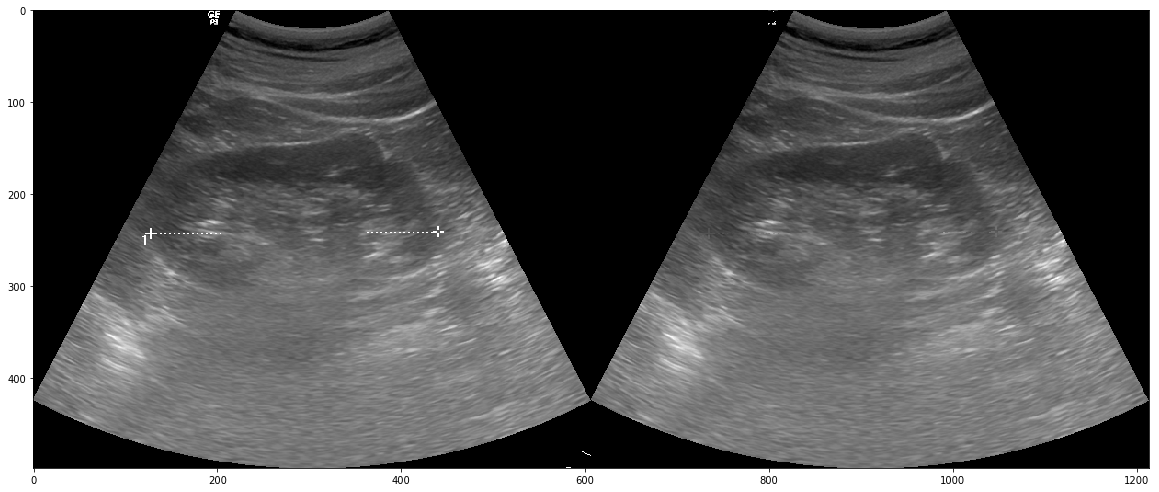

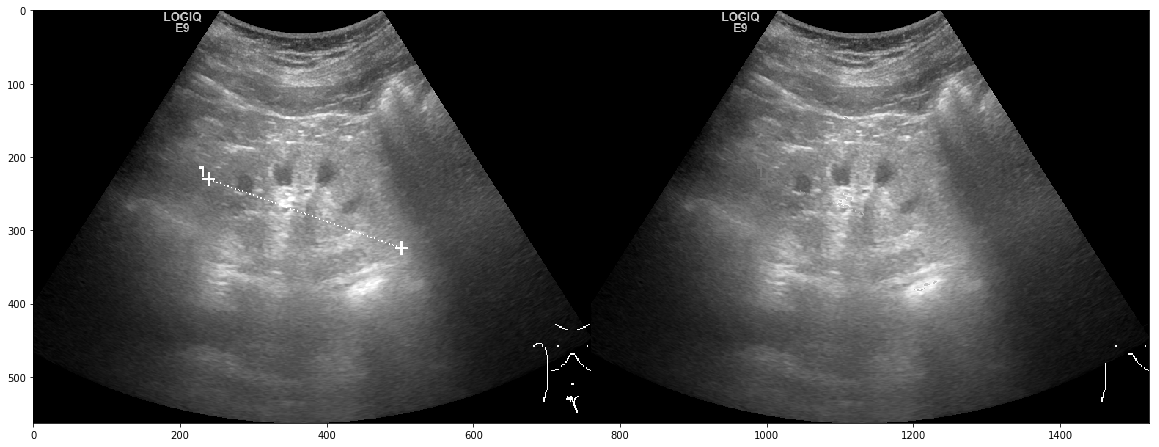

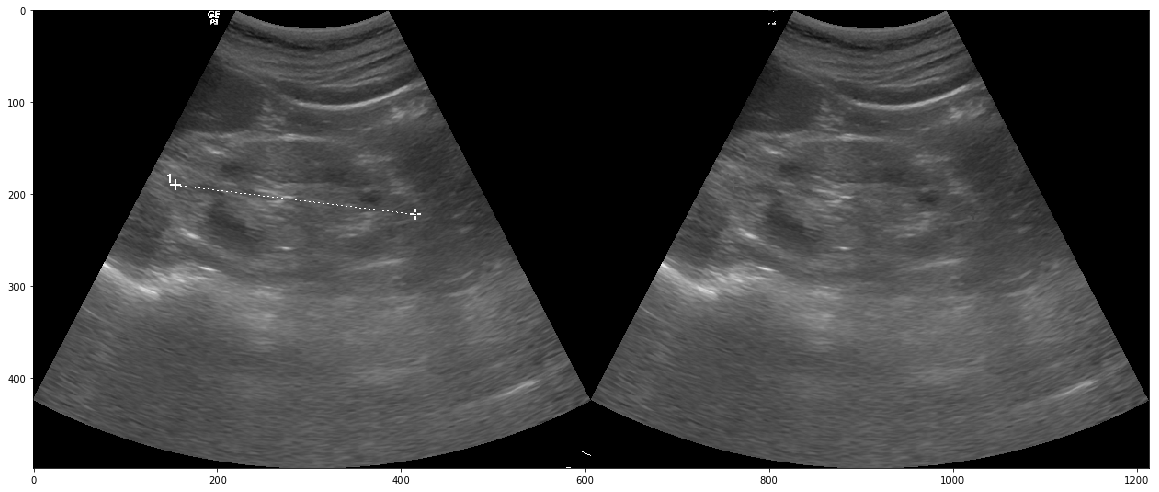

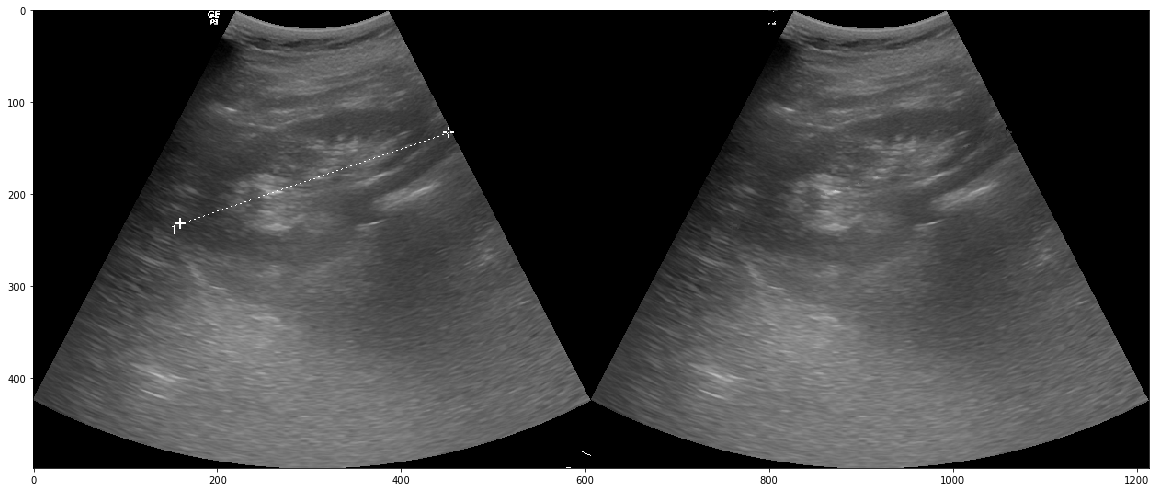

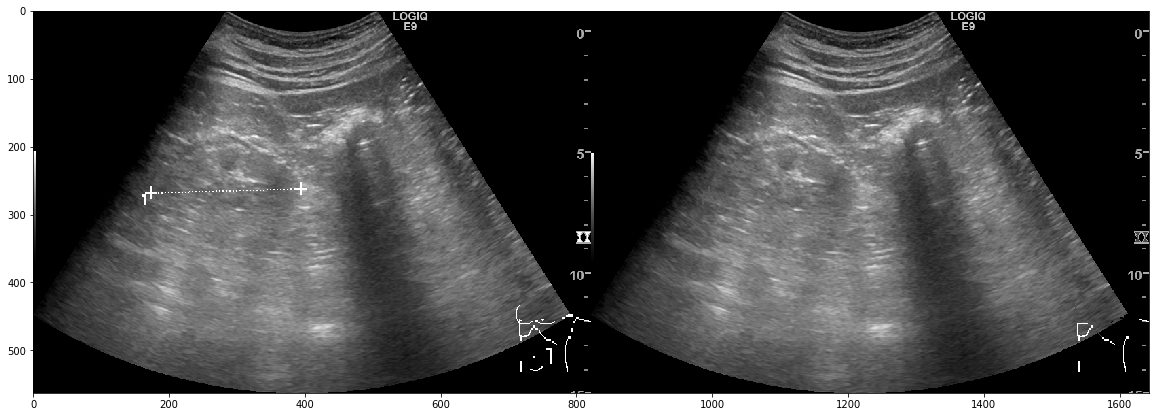

In [5]:
# loop for all image
for crop in crop_list:
    ret, im_th = cv2.threshold(crop[:, :, 1], 250, 1, cv2.THRESH_BINARY)
    im2, contours, hierarchy = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    rects = [cv2.boundingRect(ctr) for ctr in contours]
    rects = sorted(rects)
    image3 = crop.copy()
    for rect in rects:
        try:
            if rect[2] <= 3 and rect[3] <= 3:
                rang = 3
            else:
                rang = 27
            roi2 = image3[int(rect[1]):int(rect[1] + rang), int(rect[0]):int(rect[0] + rang), 1]
            roi2 = np.where(roi2 == 255, np.median(np.roll(roi2, 5, axis=0)), roi2)
            image3[int(rect[1]):int(rect[1] + rang), int(rect[0]):int(rect[0] + rang), 1] = roi2
        except:
            continue
    plt.figure(figsize=(20,20))
    plt.imshow(np.hstack((crop[:, :, 1], image3[:, :, 1])), cmap='gray')
    plt.show()
    plt.close()